# Kmeans Model Training for Segmentation

In [26]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [70]:
#importing datasets

df = pd.read_csv("C:/Users/admin/Desktop/Portfolio projects/Project_marketing/dataset/customer_segmentation_data.csv", index_col= 'id')
df.head(10)
data = df.copy()

In [3]:
num_features = ['age',
 'income',
 'spending_score',
 'membership_years',
 'purchase_frequency',
 'last_purchase_amount']

In [4]:
col_data = df[num_features]

#scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(col_data)

scaled_df = pd.DataFrame(scaled_data, columns=num_features)

scaled_df.index = df.index

#replace original columns 

df[num_features] = scaled_df

In [5]:
#categorical encoding 

df_new = pd.get_dummies(df, columns=['gender','preferred_category'], drop_first=True)

## Customer Segmentation using Kmeans

Model building


1. Choosing number of clusters

Use elbow method and silhouette score to determine the optimal number of clusters


Text(0.5, 1.0, 'Elbow Method')

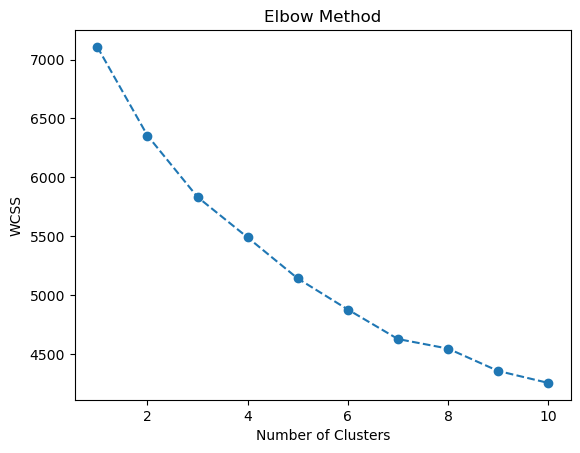

In [14]:
#elbow method

wcss =[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, marker = 'o', linestyle= '--')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.title('Elbow Method')


From elbow graph, it shows k to be 4 or 5 . Will decide after the silhouette score method

Silhouette Score for k=2: 0.10176452140459674
Silhouette Score for k=3: 0.09741313470172087
Silhouette Score for k=4: 0.0953871882767697
Silhouette Score for k=5: 0.10159899694965459
Silhouette Score for k=6: 0.10393016851128682
Silhouette Score for k=7: 0.10756820283826192
Silhouette Score for k=8: 0.0987756366882817
Silhouette Score for k=9: 0.10183340287896557
Silhouette Score for k=10: 0.09972283744854395
Optimal number of clusters: 7


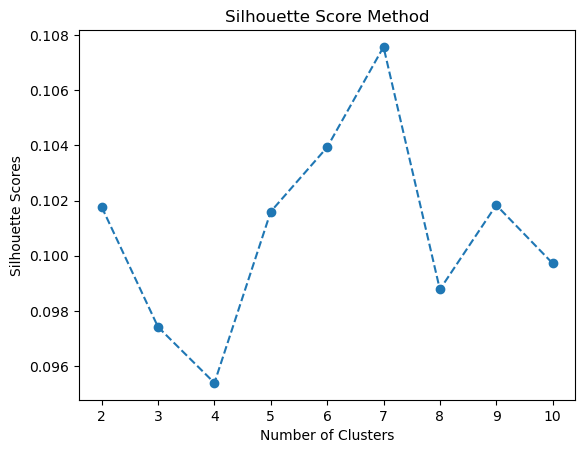

In [22]:
#silhouette scores to validate the no of clusters

silhouette_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_new)
    score = silhouette_score(df_new,kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# Find optimal k
optimal_k = range(2,11)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

plt.plot(range(2,11), silhouette_scores, marker = 'o', linestyle= '--')
plt.ylabel('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Score Method')
plt.show()

number of clusters by silhouette score is seen to be 7 to be optimal

So, I am going to take k = 5

## Model training and visualizations



In [25]:
#Choose k=5 based on elbow method and silhouette score method

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_new)

#add cluster labels 

df_new['cluster'] = kmeans.labels_

df_new

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,cluster
id,,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False,3
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True,3
3,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,False,False,False,False,False,False,2
4,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,False,True,False,False,True,False,4
5,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,False,False,True,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,True,False,False,False,False,False,2
997,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,False,True,False,True,False,False,3
998,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,True,False,False,False,False,True,3


Visualization of clusters using PCA 

PCA - visualize clusters in low dimensional space - reduce dimensionality while retaining variance

In [38]:
#visualizing cluster using PCA to 2 components

pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_new.drop('cluster',axis=1,errors='ignore'))

#add PCA componenets to data frame

df_new['PCA1'] = pca_components[:,0]
df_new['PCA2'] = pca_components[:,1]



In [54]:
#Initialize Kmeans with k=3 clusters after trials and errors

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_new.drop(['cluster','PCA1','PCA2'],axis=1,errors='ignore'))

#add cluster to the dataframe
df_new['cluster'] = labels

<Axes: xlabel='PCA1', ylabel='PCA2'>

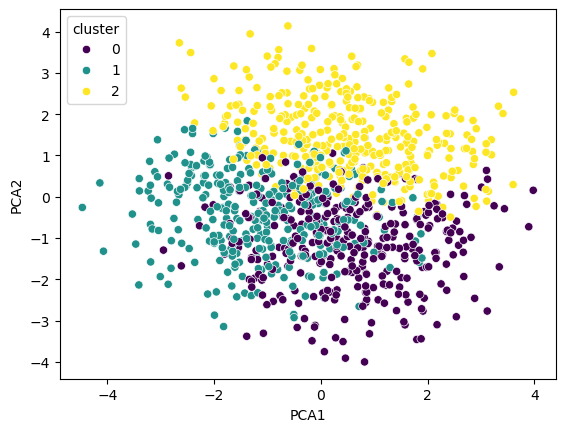

In [55]:
#visualize

sns.scatterplot(data=df_new,x='PCA1', y='PCA2', hue='cluster',palette='viridis')

## Interpreting Cluster Profiles

In [56]:
Lab_01 = df_new[df_new['cluster'] == 0]
Lab_02 = df_new[df_new['cluster'] == 1]
Lab_03 = df_new[df_new['cluster'] == 2]

In [58]:
print(f'Label 0 shape is :{Lab_01.shape}')
print(f'Label 1 shape is :{Lab_02.shape}')
print(f'Label 2 shape is :{Lab_03.shape}')

Label 0 shape is :(325, 15)
Label 1 shape is :(325, 15)
Label 2 shape is :(350, 15)


In [72]:
data['clusters'] = labels

In [76]:
segm_1 = data.loc[(data['clusters']==0)]
segm_2 = data.loc[(data['clusters']==1)]
segm_3 = data.loc[(data['clusters']==2)]

In [77]:
segm_1.head(5)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
id,,,,,,,,,
2,21,Female,78852,60,2,42,Sports,41.93,0
6,31,Other,57305,24,3,30,Home & Garden,86.85,0
7,19,Other,54319,68,5,43,Clothing,191.72,0
11,23,Other,69659,16,7,24,Clothing,434.97,0
18,22,Male,41849,22,1,31,Sports,844.08,0


In [78]:
segm_2.head(5)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
id,,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53,1
3,60,Female,126573,30,2,28,Clothing,424.36,1
5,65,Female,140621,21,3,25,Electronics,347.08,1
13,29,Female,87461,81,3,27,Home & Garden,101.07,1
14,64,Other,33018,46,4,3,Sports,221.35,1


In [79]:
segm_3.head(5)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
id,,,,,,,,,
4,40,Other,47099,74,9,5,Home & Garden,991.93,2
8,43,Male,108115,94,9,27,Groceries,734.56,2
9,53,Male,34424,29,6,7,Sports,951.71,2
10,55,Female,45839,55,7,2,Electronics,821.18,2
12,68,Other,30058,91,1,49,Groceries,889.94,2


## Business Recommendations


1. Cluster Profiling - create a summary of key characteristics of each cluster to understand their traits



In [93]:
cluster_profile = data.groupby('clusters').median(numeric_only=True)

cluster_profile['size'] = data['clusters'].value_counts()

cluster_profile

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,size
clusters,,,,,,,
0,28.0,91845.0,39.0,6.0,37.0,442.420,325
1,49.0,99427.0,58.0,5.0,16.0,215.410,325
2,53.5,73970.0,57.0,5.0,28.0,776.235,350


In [94]:
cluster_profile2 = data.groupby('clusters').mean(numeric_only=True)

cluster_profile2['size'] = data['clusters'].value_counts()

cluster_profile2

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,size
clusters,,,,,,,
0,30.181538,90800.246154,43.046154,6.073846,34.578462,449.428185,325
1,47.920000,97625.316923,55.055385,4.790769,17.916923,249.289200,325
2,52.571429,77892.834286,53.720000,5.537143,27.242857,757.901486,350


Visualizing the gender and preferred categorical variables characteriestics in the cluster

C:\Users\admin\AppData\Local\Temp\ipykernel_37332\230992939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='clusters', y ='age',ax=ax[0],palette='viridis')
C:\Users\admin\AppData\Local\Temp\ipykernel_37332\230992939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='clusters', y ='purchase_frequency',ax=ax[1],palette='viridis')
C:\Users\admin\AppData\Local\Temp\ipykernel_37332\230992939.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='clusters', y ='last_purchase_amount',ax=ax[2],palette='vi

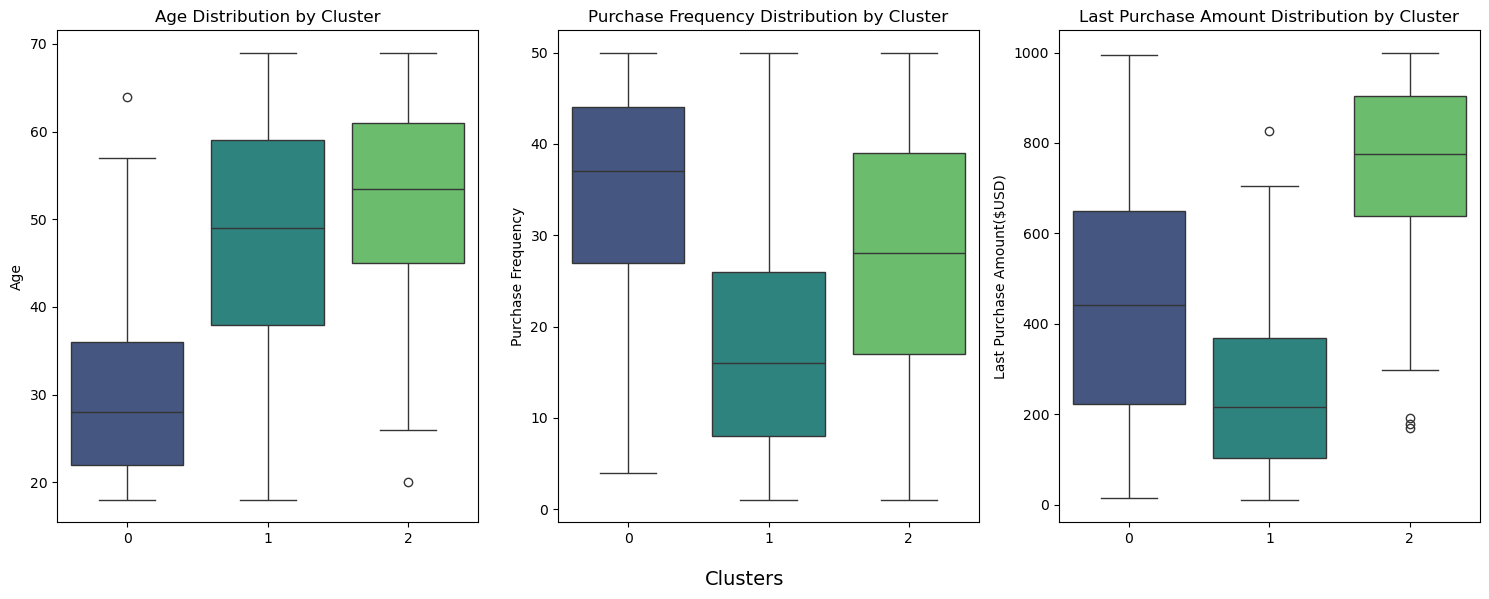

In [124]:
fig, ax = plt.subplots(1,3,figsize = (15,6))

sns.boxplot(data=data, x='clusters', y ='age',ax=ax[0],palette='viridis')
ax[0].set_title('Age Distribution by Cluster')
ax[0].set_ylabel('Age')
ax[0].set_xlabel('')

sns.boxplot(data=data, x='clusters', y ='purchase_frequency',ax=ax[1],palette='viridis')
ax[1].set_ylabel('Purchase Frequency')
ax[1].set_title('Purchase Frequency Distribution by Cluster')
ax[1].set_xlabel('')

sns.boxplot(data=data, x='clusters', y ='last_purchase_amount',ax=ax[2],palette='viridis')
ax[2].set_title('Last Purchase Amount Distribution by Cluster')
ax[2].set_ylabel('Last Purchase Amount($USD)')
ax[2].set_xlabel('')

# Add common x-label
fig.supxlabel("Clusters", fontsize=14)

plt.tight_layout()
plt.show()


In [152]:
segm_1['gender'].value_counts()

gender
Male      139
Female    102
Other      84
Name: count, dtype: int64

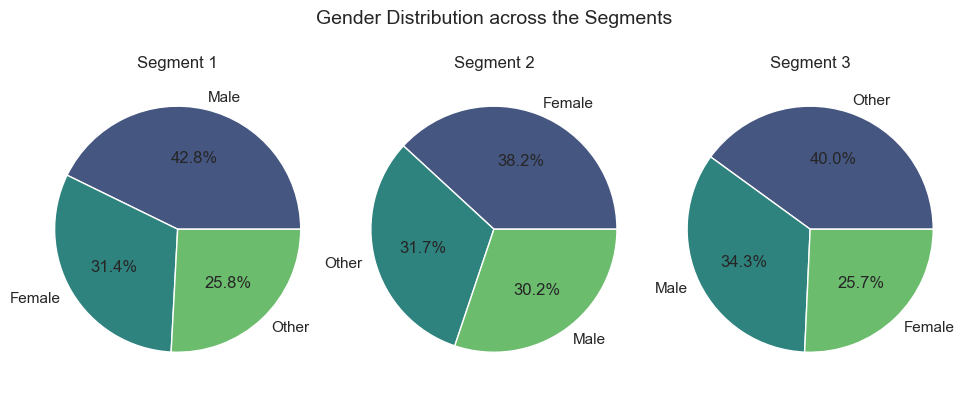

In [228]:
fig,ax = plt.subplots(1,3, figsize = (10,4))

colors = ['#455681', '#2F837F', '#6CBC6E']

ax[0].pie(segm_1['gender'].value_counts(),autopct='%1.1f%%',labels=segm_1['gender'].value_counts().index,colors=colors)
ax[0].set_title('Segment 1')

ax[1].pie(segm_2['gender'].value_counts(),autopct='%1.1f%%',labels=segm_2['gender'].value_counts().index,colors=colors)
ax[1].set_title('Segment 2')

ax[2].pie(segm_3['gender'].value_counts(),autopct='%1.1f%%',labels= segm_3['gender'].value_counts().index,colors=colors)
ax[2].set_title('Segment 3')


fig.suptitle('Gender Distribution across the Segments', fontsize=14)
fig.subplots_adjust(top=0.3,wspace=0.85)
fig.tight_layout()
plt.show()

For segment 1 profile , the dominating gender is male , while it is female for the second segment and other for the third segment. Hense we get three clusters having the three different genders so that we can categorize it across them and use for marketing decisons


Preferred Category distribution across segments


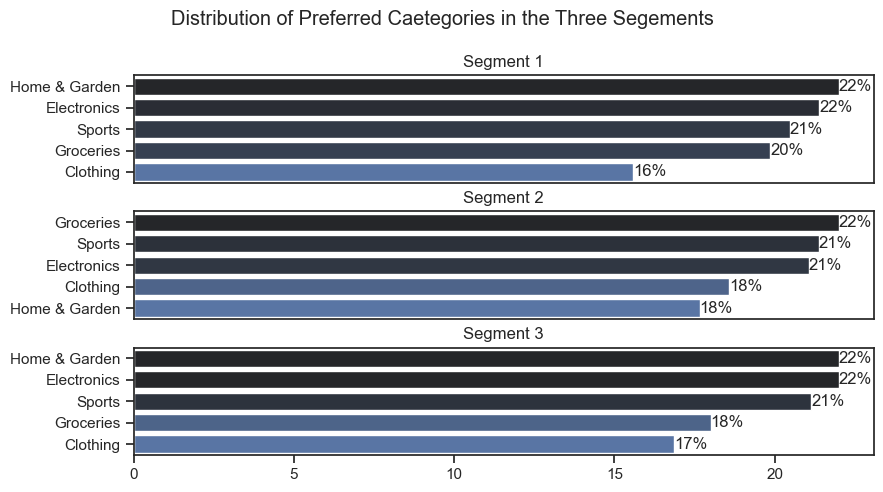

In [234]:

fig, ax = plt.subplots(3,1, figsize=(9,5))

sns.set_theme(style='ticks')


segm1_plot = segm_1['preferred_category'].value_counts().to_frame()
segm1_plot['percent'] = (segm1_plot['count']/segm1_plot['count'].sum()) * 100
sns.barplot(data=segm1_plot, x='percent', y = segm1_plot.index , hue='percent',palette='dark:b_r',ax=ax[0],legend=False)
ax[0].set_title('Segment 1')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xticks([])

for n,v in enumerate(segm1_plot['percent']):
    ax[0].text(v, n , f'{v:.0f}%',va='center')

segm2_plot = segm_2['preferred_category'].value_counts().to_frame()
segm2_plot['percent'] = (segm2_plot['count']/segm2_plot['count'].sum()) * 100
sns.barplot(data=segm2_plot, x='percent', y = segm2_plot.index , hue='percent',palette='dark:b_r',ax=ax[1],legend=False)
ax[1].set_title('Segment 2')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xticks([])
for n,v in enumerate(segm2_plot['percent']):
    ax[1].text(v, n , f'{v:.0f}%',va='center')

            
segm3_plot = segm_3['preferred_category'].value_counts().to_frame()
segm3_plot['percent'] = (segm3_plot['count']/segm3_plot['count'].sum()) * 100
sns.barplot(data=segm3_plot, x='percent', y = segm3_plot.index , hue='percent',palette='dark:b_r',ax=ax[2],legend=False)  
ax[2].set_title('Segment 3')
ax[2].set_ylabel('')
ax[2].set_xlabel('')
for n,v in enumerate(segm3_plot['percent']):
    ax[2].text(v, n , f'{v:.0f}%',va='center')



fig.suptitle('Distribution of Preferred Caetegories in the Three Segements')
fig.tight_layout(h_pad=0.5)
plt.show()

Here in the above barchart , we can see the following observations:
1. Home Garden & Electronics are the preferred categories in segment 1 which is also male dominated
2. Groceries are the preferred categories in segment 2 which is female dominated
3. Again home & garden and electronics are the preferred categories in segment 3 where the other gender dominates

In the three profiles , clothing is not a very preferred category.